# Introduction

This notebooks will look at recreating Lisa Rost's (<a href="https://twitter.com/lisacrost/status/1355816028614385666">Big Mac visualisation</a>):

<br />
<div style="display:block; margin: auto 0; width: 50%;">
  <img src="../original/big-mac.jpeg" />
</div>

This code does not seek to claim any credit or take away from Lisa's work, but merely to demonstrate how we might create this kind of visualisation in python using matplotlib


# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import highlight_text
import themepy
import json

# Data



### Population Data

In [2]:
with open("../data/population_2021.json", "r") as f:
    pop_data = f.read()
pop_data = json.loads(pop_data)
pop_data

{'China': 1439323776,
 'India': 1380004385,
 'United States': 331002651,
 'Indonesia': 273523615,
 'Pakistan': 220892340,
 'Brazil': 212559417,
 'Nigeria': 206139589,
 'Bangladesh': 164689383,
 'Russia': 145934462,
 'Mexico': 128932753,
 'Japan': 126476461,
 'Ethiopia': 114963588,
 'Philippines': 109581078,
 'Egypt': 102334404,
 'Vietnam': 97338579,
 'DR Congo': 89561403,
 'Turkey': 84339067,
 'Iran': 83992949,
 'Germany': 83783942,
 'Thailand': 69799978,
 'Britain': 67886011,
 'France': 65273511,
 'Italy': 60461826,
 'Tanzania': 59734218,
 'South Africa': 59308690,
 'Myanmar': 54409800,
 'Kenya': 53771296,
 'South Korea': 51269185,
 'Colombia': 50882891,
 'Spain': 46754778,
 'Uganda': 45741007,
 'Argentina': 45195774,
 'Algeria': 43851044,
 'Sudan': 43849260,
 'Ukraine': 43733762,
 'Iraq': 40222493,
 'Afghanistan': 38928346,
 'Poland': 37846611,
 'Canada': 37742154,
 'Morocco': 36910560,
 'Saudi Arabia': 34813871,
 'Uzbekistan': 33469203,
 'Peru': 32971854,
 'Angola': 32866272,
 'Mala

In [3]:
data = pd.read_excel("../data/Big-Mac-vs-min-wage.xlsx", sheet_name=["Economist2021","OECD wages 2018,19"])
big_mac_data = data['Economist2021']
min_wage_data = data["OECD wages 2018,19"]


In [4]:
cols = ["name", "iso_a3","Big Mac Price"]
big_mac_data = big_mac_data[cols].round(2)
cols = [x.lower().replace(" ","_") for x in cols]
cols[0] = "country"
big_mac_data.columns = cols
big_mac_data.set_index("country", inplace=True)
big_mac_data.head()

,iso_a3,big_mac_price
country,,
United Arab Emirates,ARE,4.02
Argentina,ARG,3.75
Australia,AUS,4.98
Austria,AUT,4.71
Azerbaijan,AZE,2.32


In [5]:
cols = [0,9]

min_wage_data = min_wage_data.iloc[:,cols]

cols = [x.lower().replace(" ","_") for x in min_wage_data.iloc[0].tolist()]
min_wage_data.columns = cols
min_wage_data = min_wage_data[1:].set_index("country")
min_wage_data

,ppp_hourly
country,
Australia,12.6
Belgium,11
Canada,10.2
Chile,3.1
Colombia,2.7
Czech Republic,5.8
Estonia,5.2
France,12.1
Germany,11.8


In [6]:
df = min_wage_data.join(big_mac_data)
df

,ppp_hourly,iso_a3,big_mac_price
country,,,
Australia,12.6,AUS,4.98
Belgium,11,BEL,5.29
Canada,10.2,CAN,5.29
Chile,3.1,CHL,4.09
Colombia,2.7,COL,3.74
Czech Republic,5.8,CZE,4.12
Estonia,5.2,EST,3.89
France,12.1,FRA,5.10
Germany,11.8,DEU,5.42


#### Grabbing list of EU Countries from here

https://www.kaweb.co.uk/blog/list-eu-countries-and-iso-3166-1-alpha-3-code/



In [7]:
eu_list = ["AUT", "BEL", "BGR", "HRV",
           "CYP", "CZE", "DNK", "EST", "FIN", "FRA", "DEU",
           "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX",
           "MLT", "NLD", "POL", "PRT","ROU", "SVK", "SVN",
           "ESP", "SWE"]



In [8]:
is_eu = df.iso_a3.isin(eu_list)

df["eu"] = 0
df.loc[is_eu, 'eu'] = 1

color_dict = {0: "#aaa",
              1: "#007097"}
df["color"] = df.eu.replace(color_dict)
df.color.loc["United States"] = "firebrick"

df.reset_index(inplace=True)

df["population"] = df.country.replace(pop_data)
df



/Users/peter.mckeever/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,country,ppp_hourly,iso_a3,big_mac_price,eu,color,population
0,Australia,12.6,AUS,4.98,0,#aaa,25499884
1,Belgium,11,BEL,5.29,1,#007097,11589623
2,Canada,10.2,CAN,5.29,0,#aaa,37742154
3,Chile,3.1,CHL,4.09,0,#aaa,19116201
4,Colombia,2.7,COL,3.74,0,#aaa,50882891
5,Czech Republic,5.8,CZE,4.12,1,#007097,10708981
6,Estonia,5.2,EST,3.89,1,#007097,1326535
7,France,12.1,FRA,5.10,1,#007097,65273511
8,Germany,11.8,DEU,5.42,1,#007097,83783942
9,Greece,5.7,GRC,4.01,1,#007097,10423054


#### Dropping NaNs

In [9]:
df = df[df.ppp_hourly != "-"]
df

,country,ppp_hourly,iso_a3,big_mac_price,eu,color,population
0,Australia,12.6,AUS,4.98,0,#aaa,25499884
1,Belgium,11,BEL,5.29,1,#007097,11589623
2,Canada,10.2,CAN,5.29,0,#aaa,37742154
3,Chile,3.1,CHL,4.09,0,#aaa,19116201
4,Colombia,2.7,COL,3.74,0,#aaa,50882891
5,Czech Republic,5.8,CZE,4.12,1,#007097,10708981
6,Estonia,5.2,EST,3.89,1,#007097,1326535
7,France,12.1,FRA,5.10,1,#007097,65273511
8,Germany,11.8,DEU,5.42,1,#007097,83783942
9,Greece,5.7,GRC,4.01,1,#007097,10423054


# Plotting Data

/Users/peter.mckeever/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:229: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/peter.mckeever/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:234: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


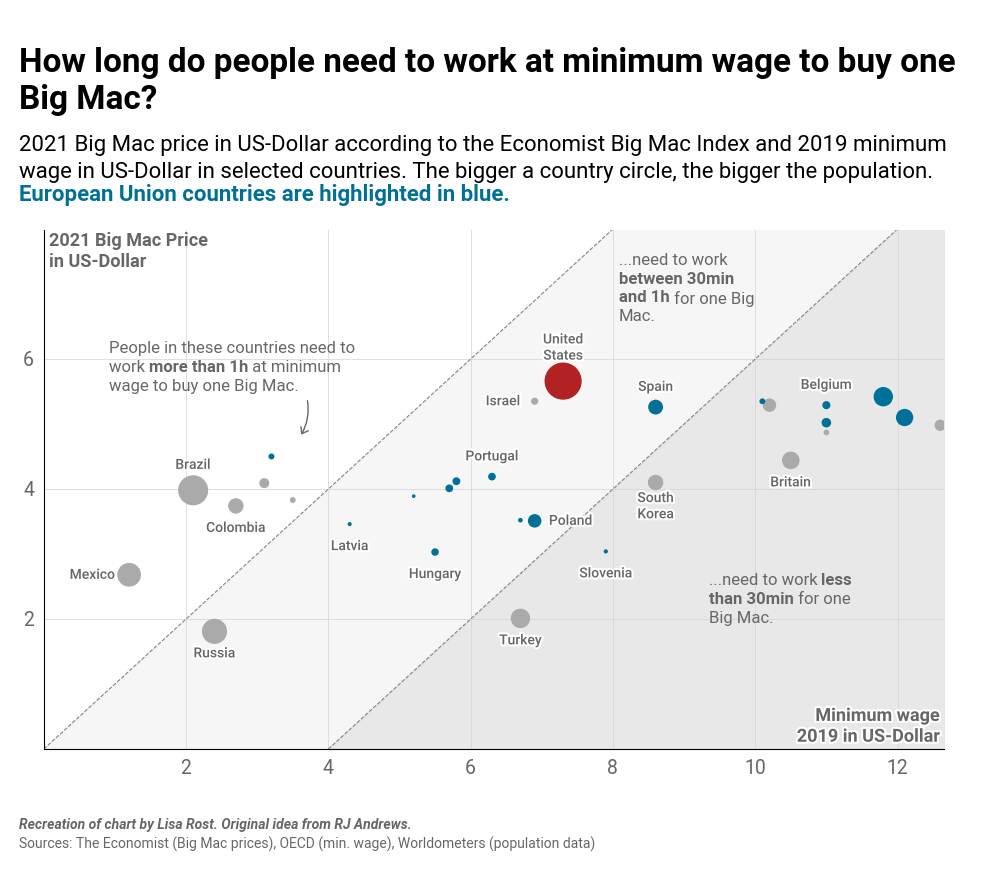

In [10]:
theme = themepy.Theme()
theme.set_pips("off")
theme.set_spines(state="off", which=["right"])


path_texts = []


fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.075,0.25,0.9,0.65])

# Grids & Spines & Dividers

ax.grid(color="lightgrey",
        lw = 0.5,
        zorder=1)

ax.spines["top"].set_color("white")

ax.plot([0, 8], [0, 8],
        ls="--", lw=0.75,
        color="grey",
        zorder=2)

ax.plot([4, 12], [0, 8],
        ls="--", lw=0.75,
        color="grey",
        zorder=2)

xs = np.linspace(0,13,100)
ys = np.linspace(0,13,100)
xs1 = np.linspace(4,17,100)

ax.fill_between(xs, ys, where=(xs <= ys), color="lightgrey", alpha=0.2)
ax.fill_between(xs1, ys, color="white", alpha=1)
ax.fill_between(xs1, ys, color="lightgrey", alpha=0.5)

# Scatter

x = df.ppp_hourly
y = df.big_mac_price
labs = df.country.tolist()
c = df.color
z = df.population
z = [x / 500000 for x in z]

ax.scatter(x, y, s=z,
           color=c,
           zorder=3)

# Title and Subs

fig.text(0.05, 1.05, "\nHow long do people need to work at minimum wage to buy one\nBig Mac?", fontfamily="Roboto", fontsize=24, fontweight="bold")

sub = "2021 Big Mac price in US-Dollar according to the Economist Big Mac Index and 2019 minimum\nwage in US-Dollar in selected countries. The bigger a country circle, the bigger the population.\n<European Union countries are highlighted in blue.>"

highlight_text.fig_text(0.05,0.925,sub,
                        fontfamily="Roboto",
                        fontsize=16,
                        highlight_colors=[color_dict[1]],
                        highlight_weights=["bold"]
                        )



# Scatter Annotation
  # ax labs 

  

ax.text(0.075,7.95,"2021 Big Mac Price\nin US-Dollar",
        fontweight="bold",
        fontsize=13,
        fontfamily="Roboto",
        va="top",
        color="#666")

path_texts.append(
    ax.text(12.6,0.05,"Minimum wage\n2019 in US-Dollar",
        fontweight="bold",
        fontsize=13,
        fontfamily="Roboto",
        va="bottom",
        ha="right",
        color="#666")
 )

  # countries

for x,y,z,lab in zip(x,y,z,labs):
    # top
    if lab in ["Portugal", "Spain", "Belgium"]:
        path_texts.append(
            ax.text(x, y+0.25, lab,
                    ha="center",
                    fontfamily="Roboto",
                    fontweight=600,
                    color="#666")
        )
    elif lab in ["United States", "Brazil"]:
        lab = lab.replace(" ","\n")
        path_texts.append(
            ax.text(x, y+0.33, lab,
                    ha="center",
                    fontfamily="Roboto",
                    fontweight=600,
                    color="#666")
        )
    # left
    elif lab in ["Mexico", "Israel"]:
        path_texts.append(
            ax.text(x-0.2, y, lab,
                    ha="right",
                    va="center",
                    fontfamily="Roboto",
                    fontweight=600,
                    color="#666")
        )
    # right
    elif lab in ["Poland"]:
        path_texts.append(
            ax.text(x+0.2, y, lab,
                    ha="left",
                    va="center",
                    fontfamily="Roboto",
                    fontweight=600,
                    color="#666")
        )
    # bottom
    elif lab in ["Russia", "Colombia", "Latvia", "Hungary", "Turkey", "Slovenia", "South Korea", "Britain"]:
        if lab == "South Korea":
            lab = lab.replace(" ","\n")
            path_texts.append(
                ax.text(x, y-0.55, lab,
                        ha="center",
                        fontfamily="Roboto",
                        fontweight=600,
                        color="#666")
            )
        else:
            path_texts.append(
                ax.text(x, y-0.4, lab,
                        ha="center",
                        fontfamily="Roboto",
                        fontweight=600,
                        color="#666")
            )






  # narrative

text = "People in these countries need to\nwork <more than 1h> at minimum\nwage to buy one Big Mac."

highlight_text.fig_text(0.14,0.76,text,
                       fontfamily="Roboto",
                       fontsize=12,
                       highlight_colors="#666",
                       highlight_weights=["bold"],
                       va="top",
                       color="#666"
                       )

ax.annotate("",
            xy=(3.6, 4.8), xycoords='data',
            xytext=(3.7, 5.4), textcoords='data',
            arrowprops=dict(arrowstyle="->, head_width=0.3",color="#666",
            connectionstyle="arc3, rad=-0.2"),
            )

text = "...need to work\n<between 30min>\n<and 1h> for one Big\nMac."

highlight_text.fig_text(0.65,0.87,text,
                       fontfamily="Roboto",
                       fontsize=12,
                       highlight_colors=["#666", "#666"],
                       highlight_weights=["bold","bold"],
                       va="top",
                       color="#666"
                       )

text = "...need to work <less>\n<than 30min> for one\nBig Mac."

highlight_text.fig_text(0.74,0.47,text,
                       fontfamily="Roboto",
                       fontsize=12,
                       highlight_colors=["#666", "#666"],
                       highlight_weights=["bold","bold"],
                       va="top",
                       color="#666"
                       )


for t in path_texts:
    t.set_path_effects([path_effects.withStroke(linewidth=3,
                                                foreground="white")])


# Credits

fig.text(0.05,0.15, "Recreation of chart by Lisa Rost. Original idea from RJ Andrews.",
         fontstyle="italic",
         fontfamily="Roboto",
         fontweight=600,
         color="#666")

fig.text(0.05,0.125, "Sources: The Economist (Big Mac prices), OECD (min. wage), Worldometers (population data)",
         fontfamily="Roboto",
         color="#666")


# Adjustments

fig.text(1,0.5, "    ")
fig.text(0.05,0.5, "  ", ha="right")
fig.text(0.5,0.1, "    ")


ax.set_yticks([0,2,4,6,8])
ax.set_yticklabels(["", 2, 4, 6, ""],
                   size=14, color="#666",
                   fontfamily="Roboto")

ax.set_xticklabels(["", 2, 4, 6, 8, 10, 12],
                   size=14, color="#666",
                   fontfamily="Roboto")

ax.set_xlim(0,12.65)
ax.set_ylim(0,8)

plt.tight_layout()
plt.savefig("../plots/test", dpi=300, bbox_inches="tight")
plt.show()